In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Варіант 9
## Частина 1
### Завдання:
#### 1. Змоделювати методом Неймана $N=100$ значень неперервної випадкової величини із заданою густиною розподілу ймовірності
Мій варіант має таку густину розподілу:
\begin{equation}
    f(x) =
    \begin{cases}
        \frac{0.25x}{2}, 0 \le x \le 2\\
        \frac{0.25x - 0.5}{2}, 2 < x \le 4\\
        \frac{0.5x - 2}{2}, 4 < x \le 6
    \end{cases}
\end{equation}
#### 2. Оцінити вибіркові математичне сподівання і дисперсію отриманої випадкової величини. 
#### 3. Побудувати гістограму та оцінити за її допомогою закон розподілу отриманої випадкової величини. Порівняти його із заданим.
#### 4. Повторити п. 1-3 для $N=1000$. 

In [2]:
def f(x):
    """Defines pairwise function"""
    assert x >= 0, f'x must be greater or equal to 0, {x} found'
    if x <= 2:
        return 0.25 * x / 2
    elif x > 2 and x <= 4:
        return (0.25 * x - 0.5) / 2
    else:
        return (0.5 * x - 2) / 2
    
def neumann(a, b, n):
    """
    Generates `n` random numbers from the given density probability distribution
    """
    assert b > a, 'b must be greater than a'
    assert n > 0, f'n must be greater than 0, {n} found'
    result = []
    while len(result) <= n:
        r1, r2 = np.random.rand(2)
        x0 = a + r1 * (b - a)
        m = 0.5 if x0 > 4 else 0.25
        if r2 * m <= f(x0):
            result.append(x0)
    return sorted(result)

Experimental E[X]: 3.5801480201473037
Experimental Var[x]: 2.4467574043764917


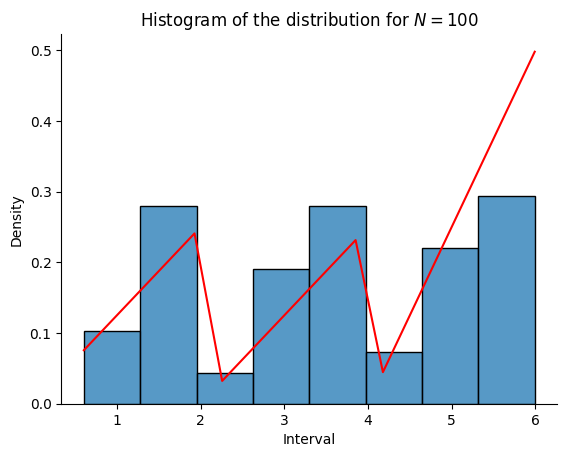

Experimental E[X]: 3.3857828121210005
Experimental Var[x]: 2.9803916872434684


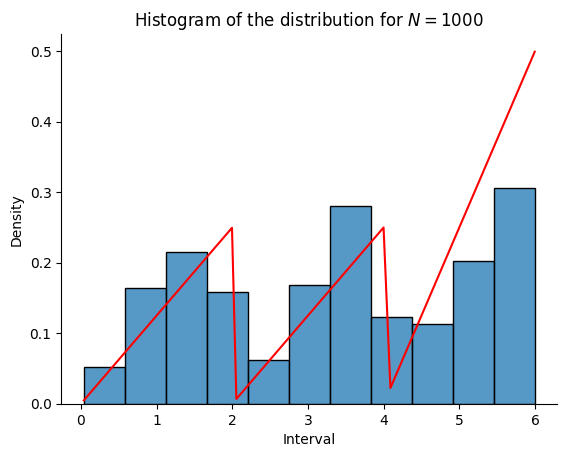

In [3]:
for n in (100, 1000):
    # generate n random numbers from the given PDF
    a = np.array(neumann(0, 6, n))
    # calculate E[X] and Var[X]
    print('Experimental E[X]:', a.mean())
    print('Experimental Var[x]:', a.var(ddof=1))
    # plot histogram
    plt.title(f'Histogram of the distribution for $N={n}$')
    plt.xlabel('Interval')
    sns.histplot(a, stat='density')
    plt.plot(a, [f(x) for x in a], 'r')
    sns.despine()
    plt.show()

## Частина 2
### Завдання:
#### 1. Змоделювати послідовність із $N=100$ значень випадкової величини $X$, розподіленої за:
- показниковим законом
- нормальним законом

#### 2. Для кожної вибірки визначити вибіркове середнє і вибіркову дисперсію та порівняти їх з теоретичними значеннями.
#### 3. Побудувати гістограми та оцінити за їх допомогою закон розподілу випадкової величини $X$.
#### 4. Повторити виконання роботи для $N=1000$

Theoretical E[X]: 1.1111111111111112
Experimental E[X]: 1.1095996862052002
Theoretical Var[X]: 1.2345679012345678
Experimental Var[X]: 1.1423916853923888


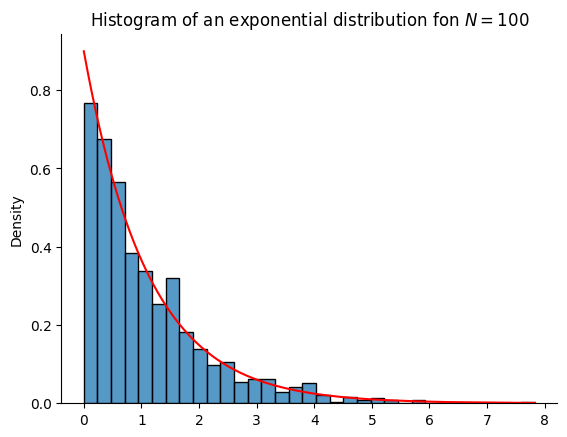

Theoretical E[X]: 1.1111111111111112
Experimental E[X]: 1.161498553458246
Theoretical Var[X]: 1.2345679012345678
Experimental Var[X]: 1.2677026506843139


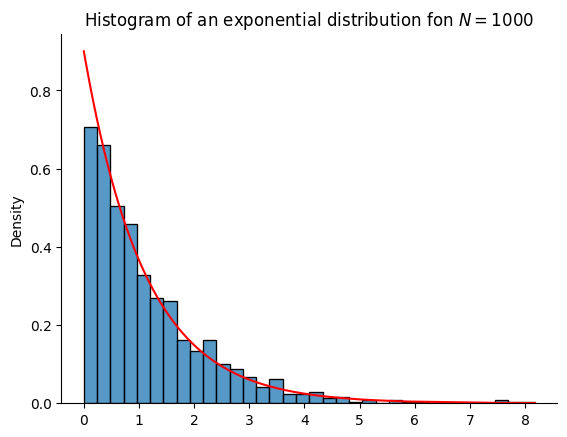

In [4]:
lam = 0.9
for n in (100, 1000):
    # generate n random numbers from an exponential distribution
    r = np.sort(np.random.rand(1000))
    x = -np.log(r) / lam
    # compute theoretical and experimental E[X] and Var[X]
    print('Theoretical E[X]:', 1 / lam)
    print('Experimental E[X]:', x.mean())
    print('Theoretical Var[X]:', 1 / lam ** 2)
    print('Experimental Var[X]:', x.var(ddof=1))
    # plot the histogram
    y = np.piecewise(x, [x <= 0, x > 0], [0, lambda x: lam * np.exp(-lam * x)])
    plt.title(f'Histogram of an exponential distribution fon $N={n}$')
    sns.histplot(x, stat='density')
    plt.plot(x, y, 'r')
    sns.despine()
    plt.show()

In [5]:
def norm(x, m=0, sig=1):
    """A normal continuous random variable"""
    return np.exp(-(x - m) ** 2 / (2 * sig ** 2)) / (sig * math.sqrt(2 * math.pi))

Theoretical E[X]: 9
Experimental E[X]: 8.105800397399888
Theoretical Var[X]: 16
Experimental Var[X]: 15.222208064662292


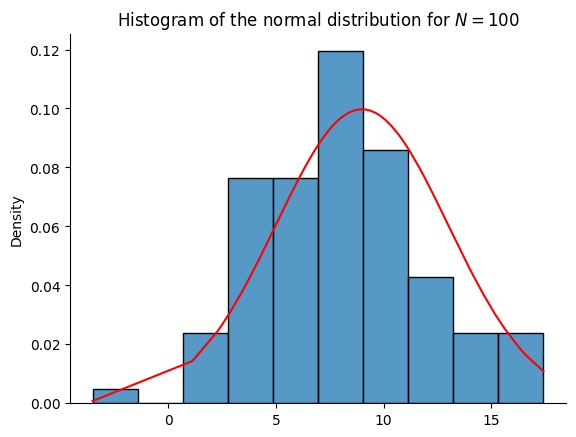

Theoretical E[X]: 9
Experimental E[X]: 8.958549076144527
Theoretical Var[X]: 16
Experimental Var[X]: 16.327116444065314


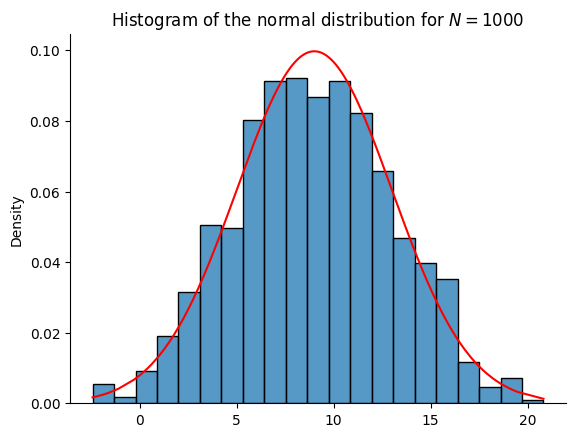

In [6]:
m = 9
sig = 9 % 5
for n in (100, 1000):
    # generate n random numbers from the normal distribution
    x = np.sort((np.random.rand(n, 12).sum(1) - 6) * sig + m)
    # compute theoretical and experimental E[X] and Var[X]
    print('Theoretical E[X]:', m)
    print('Experimental E[X]:', x.mean())
    print('Theoretical Var[X]:', sig ** 2)
    print('Experimental Var[X]:', x.var(ddof=1))
    # plot the histogram
    plt.title(f'Histogram of the normal distribution for $N={n}$')
    sns.histplot(x, stat='density')
    plt.plot(x, norm(x, m, sig), 'r')
    sns.despine()
    plt.show()